# Лабoраторная работа 5
## Белоцкий Дмитрий 853504 (16 вариант)
# Система массового обслуживания

## Условие
![](task16.png)

Интенсивоность: $\lambda$ = X  <br>
Время обслуживания - показательное распределение с параметром X. <br>$\mu$ = X, => среднее время обслуживания 1 / X

## Решение
$s_0$ - СМО свободна <br/>
$s_1$ - занят один канал <br/>
$s_k$ - занято k каналов (1 <= k <= n) <br/>
$s_n$ - заняты все n каналов <br/>
$s_{n+r}$ - заняты все n каналов, а r заявое стоит в очереди <br/>
Граф состояний приведен ниже
![](state_graph.png)
где интенсивность потока обслуживаний $\widetilde{\mu} = p\mu$ = pX <br/>
Тогда $\widetilde{p}$ = $\lambda$ / $\widetilde{\mu}$ = $\lambda$ / $p\mu$ = X / pX = 1 / p <br/>
Условие установления предельного страционарного режима: $\widetilde{p}$ <= n (выберем значение. n подходящим под данное условие)

##  Финальные вероятности состояний
Финальные вероятности состояний выражаются следующими формулами
![](final_probabilities.png)
Только в нашем случае: <br/> p -> $\widetilde{p}$ = 1 / p <br/> $\chi$ = $\widetilde{p}$ / n = 1 / np

### Найдем вероятности состояния системы:


In [51]:
import math

p = 0.1 # probability of accept
n = 4

p_tilde = 1 / p
chi = p_tilde / n

def p_0(p_tilde, chi, n):
    result = 1
    for i in range(1, n + 1):
        result += (p_tilde ** i / math.factorial(i))
    result += (p_tilde ** (n + 1) / (n * math.factorial(n))) * (1 / (1 - chi))
    return 1 / result
    
def p_k(p_tilde, k, p_0):
    return p_tilde ** k * p_0 / math.factorial(k)

def p_n_r(p_tilde, n, r, p_0):
    return p_tilde ** (n + r) * p_0 / (n ** r * math.factorial(n))
    

def calculate_probabilities(p_tilde, chi, n, size):
    if(size < n):
        print('Стоит выбрать размер больше n')
        return
    p_list = []
    _p_0 = p_0(p_tilde, chi, n)
    p_list.append(_p_0)
    for k in range(1, n + 1):
        p_list.append(p_k(p_tilde, k, _p_0))
    for r in range(1, size - n + 1):
        p_list.append(p_n_r(p_tilde, n, r, _p_0))
    return p_list

In [52]:
size = 12

if chi <= 1:
    p_list = calculate_probabilities(p_tilde, chi, n, size)
    for i in range(size):
        print(f'p[{i}] :  {p_list[i]}')
    print(f'sum : {sum(p_list)}')
else:
    print('Условие установления предельного страционарного режима не выполнено')

Условие установления предельного страционарного режима не выполнено


##  Характеристики эффективности СМО
1) Одним из наиболее важных показателей эффективности системы массового обслуживания является величина Ротк — вероятность того, что поступающее в систему требование отказывается присоединиться к очереди и теряется. В данном случае $$ P_{отк} = 0 $$ т.к. имеем неограниченную очередь (Данный показатель не имеет особого смысла для нашей системы) <br/>
2) Вторым важным показателем эффективности, относящимся к первой группе, является среднее количество требований, ожидающих обслуживания, — $ М_{ож} $. 
![](m_waiting.png)
Среднее количество требований, находящихся в системе обслуживания как в очереди, так и на обслуживании, можно найти по формуле
![](m_all.png)

In [32]:
def m_waiting(n, p_list):
    m = 0
    for i in range(n + 1, len(p_list)):
        m += i * p_list[i]
    return m
        
def m_all(n, p_list):
    m = 0
    for i in range(len(p_list)):
        m += i * p_list[i]
    return m

def mean_busy_channels(n, p_list):
    m = 0
    for i in range(n + 1):
        m += i * p_list[i]
    for i in range(n + 1, len(p_list)):
        m += n * p_list[i]
    return m

def mean_free_channels(n, p_list):
    return n - mean_busy_channels(n, p_list)

def dispersion_busy_chaneels(n, p_list):
    mean = mean_busy_channels(n, p_list)
    d = 0
    for i in range(n + 1):
        d += p_list[i] * (i - mean) ** 2
    for i in range(n + 1, len(p_list)):
        d += p_list[i] * (n - mean) ** 2
    return d


print('среднее количество заявок в очереди: ', m_waiting(n, p_list))
print('среднее количество заявок в системе: ', m_all(n, p_list))
print('среднее количество заявок в обслуживании : ', m_all(n, p_list) - m_waiting(n, p_list))

print('среднее количество занятых каналов: ', mean_busy_channels(n, p_list))
print('Дисперсионный момент : ', dispersion_busy_chaneels(n, p_list))
print('среднее количество свободных каналов: ', mean_free_channels(n, p_list))
print('Коэффициент загрузки оборудования: ', mean_busy_channels(n, p_list) / n)
print('Коэффициент простоя оборудования: ', mean_free_channels(n, p_list) / n)

среднее количество заявок в очереди:  0.24345805973046594
среднее количество заявок в системе:  1.7393317002179773
среднее количество заявок в обслуживании :  1.4958736404875115
среднее количество занятых каналов:  1.6665115065134044
Дисперсионный момент :  1.4956624462655248
среднее количество свободных каналов:  2.3334884934865956
Коэффициент загрузки оборудования:  0.4166278766283511
Коэффициент простоя оборудования:  0.5833721233716489


Для оценки среднего времени ожидания в системе зададим значение X

In [33]:
X = 3
mean_t = 1 / X
print('Среднее время разрешения заявки: ', mean_t)
print('Среднее время нахождения в очереди: ', mean_t * m_waiting(n, p_list))
print('Среднее время нахождения в системе: ', mean_t + mean_t * m_waiting(n, p_list))

Среднее время разрешения заявки:  0.3333333333333333
Среднее время нахождения в очереди:  0.08115268657682198
Среднее время нахождения в системе:  0.4144860199101553


##  Среднее число рекламаций

In [34]:
complaint_rate = 0.3
mean_current_claims = m_all(n, p_list) - m_waiting(n, p_list)
mean_complaint_number = mean_current_claims * (1 - p) * complaint_rate
print('Среднее число рекламаций за единицу времени: ', mean_complaint_number)

Среднее число рекламаций за единицу времени:  0.17950483685850135


##  Моделирование СМО

In [39]:
import random
import numpy as np

class Claim:
    def __init__(self):
        self.time_in_system = 0
        self.time_in_queue = 0
        self.time_in_processing = 0
        self.complaint_number = 0
        
class Channel:
    def __init__(self):
        self.is_free = True
        self.time_to_solve_remaining = 0

class QueuingSystemGenerator:
    
    def __init__(self, n, probability, X, time_discreteness, R, size_of_probabilities):
        self.probability = probability
        self.n = n
        self.channels = [Channel() for i in range(n)]
        self.claims = []
        self.X = X
        self.time_step = 1 / time_discreteness
        self.time_discreteness = time_discreteness
        self.processedClaims = []
        self.complaint_prob = R
        self.size_of_probabilities = size_of_probabilities
        self.channel_probabilities = [0 for i in range(size_of_probabilities)]
        
    def rand_is_claim_accepted(self):
        return random.random() < self.probability
    
    def rand_claim_resolve_time(self):
        return np.random.exponential(1 / self.X)
        
    def rand_new_claim_comming(self):
        return random.random() < self.X / self.time_discreteness
    
    def rand_is_complaint(self):
        return random.random() < self.complaint_prob
        
    def busy_channels_count(self):
        count = 0
        for i in range(len(self.channels)):
            if self.channels[i].is_free == False:
                count += 1
        return count
    
    def simulate_coming_claims(self):
        has_come = self.rand_new_claim_comming()
        if has_come:
            self.claims.append(Claim())
            
    def simulate_claim_to_free_channels(self):
        for i in range(len(self.channels)):
            if self.channels[i].is_free:
                if len(self.claims) == 0:
                    break
                self.channels[i].solving_claim = self.claims.pop()
                self.channels[i].is_free = False
                self.channels[i].time_to_solve_remaining += self.rand_claim_resolve_time()
                

        
    def simulate_process_claims(self):
        for i in range(len(self.claims)):
            self.claims[i].time_in_queue += self.time_step
            
        for i in range(len(self.channels)):
            if self.channels[i].is_free == False:
                claim = self.channels[i].solving_claim
                if self.channels[i].time_to_solve_remaining > 0:
                    self.channels[i].time_to_solve_remaining -= self.time_step
                    claim.time_in_processing += self.time_step
                else:
                    self.channels[i].is_free = True
                    self.time_to_solve_remaining = 0
                    is_claim_accepted = self.rand_is_claim_accepted()
                    if is_claim_accepted:
                        self.processedClaims.append(claim)
                    else: 
                        self.claims.append(claim)
                        if self.rand_is_complaint():
                            claim.complaint_number += 1
                            
    
    def next_time_step(self):
        # 1) step where claims are coming to the system
        self.simulate_coming_claims()
        # 2) step where claims are coming from queue to channel
        self.simulate_claim_to_free_channels()
        # 3) step where claims are processing in channel
        self.simulate_process_claims()
        
    def run_simulation(self, time_units):
        avg_busy_channels = 0
        for i in range(time_units * self.time_discreteness):
            self.next_time_step()
            busy_channels = self.busy_channels_count()
            avg_busy_channels = (avg_busy_channels * i + busy_channels) / ( i + 1)
            
            if busy_channels == n:
                claims_in_queue = len(self.claims)
                busy_channels += claims_in_queue
            if busy_channels < self.size_of_probabilities:
                self.channel_probabilities[busy_channels] += 1
                
        print('Среднее количество занятых каналов: ' , avg_busy_channels)
        self.channel_probabilities = [self.channel_probabilities[i] / (time_units * self.time_discreteness) for i in range(len(self.channel_probabilities))]
        return self.channel_probabilities

In [46]:
X = 1
time_discreteness = 100
R = 0.3
size_of_probabilities = 13

generator = QueuingSystemGenerator(n, p, X, time_discreteness, R, size_of_probabilities)
channel_probabilities = generator.run_simulation(10000)

Среднее количество занятых каналов:  1.6808520000000018


In [47]:
print(p_list)

[0.1859321200196753, 0.30988686669945886, 0.2582390555828824, 0.14346614199049024, 0.059777559162704254, 0.024907316317793443, 0.010378048465747268, 0.004324186860728029, 0.0018017445253033454, 0.0007507268855430606, 0.00031280286897627526, 0.0001303345287401147, 5.4306053641714454e-05]


## Вывод

Сравнение аналитических результатов и симуляции

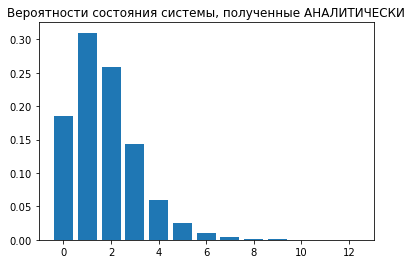

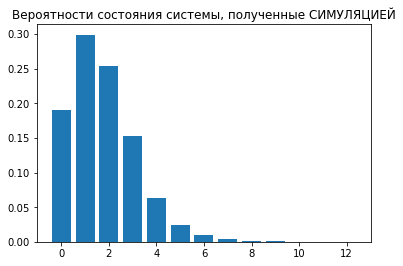

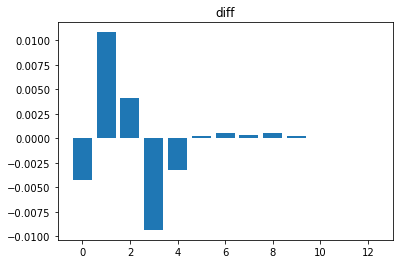

In [48]:
import matplotlib.pyplot as plt

plt.bar(range(len(p_list)), p_list)
plt.title('Вероятности состояния системы, полученные АНАЛИТИЧЕСКИ')
plt.show()

plt.bar(range(len(channel_probabilities)), channel_probabilities)
plt.title('Вероятности состояния системы, полученные СИМУЛЯЦИЕЙ')
plt.show()

diff = []
for i in range(len(p_list)):
    diff.append(p_list[i] - channel_probabilities[i])
plt.bar(range(len(diff)), diff)
plt.title('diff')
plt.show()